# Appendix C

This is the class that was used for turning experiment .csv data into numpy arrays 

In [1]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os

#Making main class that seperates experiment file into numpy arrays
class Experiment(object):
	def __init__(self, file=None):
		self.file = file
		fo = open(self.file, 'rU')
		reader = csv.reader(fo)
		self.Time = np.array([])
		self.A = np.array([])
		self.D = np.array([])
		self.U = np.array([])
		for irow in enumerate(reader):
			i, row = irow
			if i == 1:
				#Constants
				self.Ca0 = float(row[1])
				self.C = float(row[4])
				self.T = float(row[5])
			elif i > 1:
				#Getting all changing values
				self.Time = np.append(self.Time, float(row[0]))
				self.A = np.append(self.A, float(row[1]))
				self.D = np.append(self.D, float(row[2]))
				self.U = np.append(self.U, float(row[3]))
			else:
				pass #Dont care about first row



		#Getting I array without the zero values
		self.I = self.A[0] - (self.A + self.D + self.U)
		self.I = [i if i > .0001 else 0 for i in self.I]
		self.I = np.array(self.I)

		#Getting reaction rates using numpy.gradient
		self.rA = np.gradient(self.A, (self.Time[5]-self.Time[4]))
		self.rD = np.gradient(self.D, (self.Time[5]-self.Time[4]))
		self.rU = np.gradient(self.U, (self.Time[5]-self.Time[4]))
		self.rI = np.gradient(self.I, (self.Time[5]-self.Time[4]))
        


This is how we loaded all experiments in a directory into a list of experiment objects, if this were to be used again the directory would need to be changed.

In [2]:
#Loading every .csv in a directory
Experiment_file_list = []
Experiments = []
for file in os.listdir('/Users/jameslipe/documents/kinetics_project'): #THIS LINE WOULD NEED TO BE CHANGED
    if file.endswith('.csv'):
        Experiments.append(Experiment(file))

Below are some examples of how to use these experiment objects to filter through experiment results to quickly plot and analyze multiple graphs

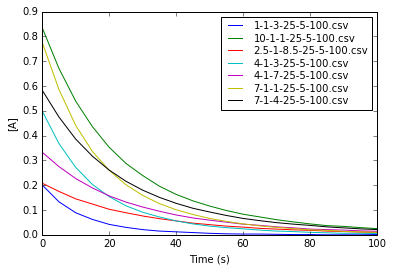

In [3]:
for i in Experiments:
    #Filter results based on parameters
    if i.T == 298.2 and i.Time[-1] == 100 and max(i.I) > .004:
        #Plot results and even add labels
        plt.plot(i.Time, i.A, '-', label='%s' % i.file)

plt.xlabel('Time (s)')
plt.ylabel('[A]')
plt.legend(loc = 'upper right', fontsize = 'medium', labelspacing=.25)
plt.show()

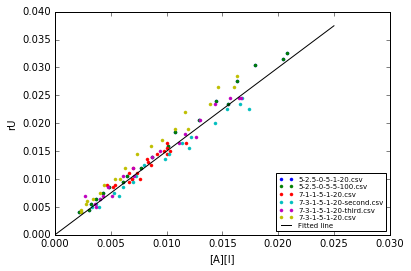

In [106]:
#By using numpy arrays, arrays can be easily manipulated

#It is also easy to get slopes
slopes = []
for i in Experiments:
    if i.T == 278.2 and i.Time[-1] == 20:
        #Multiply arrays while plotting, not plotting T = 0 because graph is innacruate then 
        plt.plot(i.A[1:] * i.I[1:], i.rU[1:], '.', label='%s' % i.file)
        #Append slope calculated with linregress to slope list
        slopes.append(scipy.stats.linregress(i.A[1:] * i.I[1:], i.rU[1:])[0])
        
        
#Testing slopes agianst measured data
slope_avg = sum(slopes)/len(slopes)
test_x = np.linspace(0,.025,50)
test_y = [slope_avg * x for x in test_x]
plt.plot(test_x, test_y, '-', label="Fitted line")

#Formatting plot
plt.xlabel('[A][I]')
plt.ylabel('rU')
plt.legend(loc = 'lower right', fontsize = 'x-small', labelspacing = 0.25)
plt.show()

One more example while using scipy.stats.sem to find the standard error

Average slope = 0.336
Error = 0.034


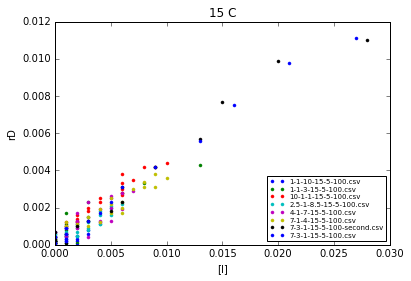

In [240]:
slopes = []
for i in Experiments:
    if i.T == 288.2 and i.Time[-1] == 100:
        #Multiply arrays while plotting, not plotting T = 0 because graph is innacruate then 
        plt.plot(i.I[1:], i.rD[1:], '.', label='%s' % i.file)
        #Append slope calculated with linregress to slope list
        slopes.append(scipy.stats.linregress(i.I[1:], i.rD[1:])[0])
        
print 'Average slope = %.3f' % float(sum(slopes)/len(slopes))
print 'Error = %.3f' % scipy.stats.sem(slopes)

#Formatting plot
plt.xlabel('[I]')
plt.ylabel('rD')
plt.title('15 C')
plt.legend(loc = 'lower right', fontsize = 'x-small', labelspacing = 0.25)
plt.show()